'clo' (Interferometric Closure Phase) Dataset
====================================

Background
-----------------

See [Interferometric Visibility](VIS.ipynb) for an introduction.

Another observable is the complex triple product T_3. It is defined for 3 telescopes as:

`T_3 = mu_1 mu_2 mu_3`

where the complex visibilities correspond to 3 different baselines, denoted u1, v1, u2, v2, u3, v3.
Because u3 = -(u1+u2), v3 = -(v1+v2), the measurement is perfomed on a 'triangle' of telescopes.

```
       u3,v3    
                
      o----o    
      |   /     
u1,v1 |  /      
      | /  u2,v2
      |/        
      o         
                
```

From this, one obtains the closure phase arg T_3 and the triple product amplitude |T_3|.
Interestingly, the phase is not affected by seeing; the measurement is self-calibrating.


Setup
--------

As a preparatory task, we create a file `Clo.dat`:

In [1]:
f = open("Clo.dat", "w")
f.write("# time u1 v1 u2 v2 wavelength bandwidth clo sigma\n")

t = 0.0                # d
u1 = 50.0              # m
v1 = 100.0             # m
u2 = 250.0             # m
v2 = 200.0             # m
wavelength = 550.0e-9  # m
bandwidth = 100.0e-9   # m
clo = 0.0              # 1
sigma = 0.1            # 1

dt = 0.05              # d
while t <= 1.0+0.5*dt:
    f.write("%.8f  %.8e  %.8e  %.8e  %.8e  %.8e  %.8e  %.8f  %.8f\n" % (t, u1, v1, u2, v2, wavelength, bandwidth, clo, sigma))
    t += dt

f.close()

Note: Make sure to have the latest version of PHOEBE 2.5 installed (uncomment this line if running in an online notebook session such as colab).

In [2]:
#!pip install -I "phoebe>=2.5,<2.6"

As always, let's do imports and add a new Bundle.

In [3]:
import phoebe

b = phoebe.default_binary()

Parameters
----------------

Next read `Clo.dat` back and add the corresponding 'clo' dataset:

In [4]:
import numpy as np

times, u1, v1, u2, v2, wavelengths, clos, sigmas = np.loadtxt("Clo.dat", usecols=[0, 1, 2, 3, 4, 5, 7, 8], unpack=True)

b.add_dataset('clo', times=times, u1=u1, v1=v1, u2=u2, v2=v2, wavelengths=wavelengths, clos=clos, sigmas=sigmas)

<ParameterSet: 70 parameters | contexts: dataset, compute, figure>

To verify:

In [5]:
print(b.get_dataset(kind='clo'))

ParameterSet: 14 parameters
              times@clo01@dataset: [0.   0.05 0.1  ... 0.9  0.95 1.  ] d
                 u1@clo01@dataset: [50. 50. 50. ... 50. 50. 50.] m
                 v1@clo01@dataset: [100. 100. 100. ... 100. 100. 100.] m
                 u2@clo01@dataset: [250. 250. 250. ... 250. 250. 250.] m
                 v2@clo01@dataset: [200. 200. 200. ... 200. 200. 200.] m
        wavelengths@clo01@dataset: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07
 5.5e-07] m
               clos@clo01@dataset: [0. 0. 0. ... 0. 0. 0.]
      compute_times@clo01@dataset: [] d
             sigmas@clo01@dataset: [0.1 0.1 0.1 ... 0.1 0.1 0.1]
          if_method@clo01@dataset: integrate
           passband@clo01@dataset: Johnson:V
   intens_weighting@clo01@dataset: energy
    ld_mode@primary@clo01@dataset: interp
   ld_mode@secondary@clo01@dat...: interp


### times
To see explanations:

In [6]:
print(b.get_parameter(kind='clo', qualifier='times', context='dataset'))

Parameter: times@clo01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [0.   0.05 0.1  ... 0.9  0.95 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### u1
Alternatively, one can use the `twig` syntax.
 
Note: Here, u coordinate is in metres. Above, (u, v) = B/lambda was in cycles per baseline.

In [7]:
print(b['u1@clo01@clo@dataset'])

Parameter: u1@clo01@dataset
                       Qualifier: u1
                     Description: Observed baseline u
                           Value: [50. 50. 50. ... 50. 50. 50.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### v1

In [8]:
print(b['v1@clo01@clo@dataset'])

Parameter: v1@clo01@dataset
                       Qualifier: v1
                     Description: Observed baseline v
                           Value: [100. 100. 100. ... 100. 100. 100.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### u2

In [9]:
print(b['u2@clo01@clo@dataset'])

Parameter: u2@clo01@dataset
                       Qualifier: u2
                     Description: Observed baseline u
                           Value: [250. 250. 250. ... 250. 250. 250.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### v2

In [10]:
print(b['v2@clo01@clo@dataset'])

Parameter: v2@clo01@dataset
                       Qualifier: v2
                     Description: Observed baseline v
                           Value: [200. 200. 200. ... 200. 200. 200.] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### wavelengths

In [11]:
print(b['wavelengths@clo01@clo@dataset'])

Parameter: wavelengths@clo01@dataset
                       Qualifier: wavelengths
                     Description: Observed wavelengths
                           Value: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07 5.5e-07] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### clos
Note: Here, clos is in degrees!

In [12]:
print(b['clos@clo01@clo@dataset'])

Parameter: clos@clo01@dataset
                       Qualifier: clos
                     Description: Observed interferometric closure phase arg T_3
                           Value: [0. 0. 0. ... 0. 0. 0.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [13]:
print(b['sigmas@clo01@clo@dataset'])

Parameter: sigmas@clo01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty of visibility
                           Value: [0.1 0.1 0.1 ... 0.1 0.1 0.1]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### if_method
One can choose either a simple model, assuming a limb-darkened disk(s), or a complex model, with integration over meshes --- i.e., applicable to contact or eclipsing binaries.

In [14]:
print(b.get_parameter(qualifier='if_method', context='dataset'))

Parameter: if_method@clo01@dataset
                       Qualifier: if_method
                     Description: Method to use for computing interferometric visibility (must be integrate for eclipse effects)
                           Value: integrate
                         Choices: integrate, simple
                  Constrained by: 
                      Constrains: None
                      Related to: None



Of course, one has to set up the distance, because 'everything' is affected by angular dimensions! Moreover, we alter the inclination and temperature (cf. photocentre motions below).

In [15]:
from astropy import units

b.set_value('distance', context = 'system', value=100*units.pc)
b.set_value('incl@binary@orbit', value=80*units.deg)
b.set_value('teff@secondary@component', value=5000.0)

Model
---------

Eventually, a computation is run as:

In [16]:
b.run_compute()

100%|██████████| 21/21 [00:06<00:00,  3.14it/s]


<ParameterSet: 9 parameters | qualifiers: v1, if_method, v2, clos, u2, u1, wavelengths, times, comments>

I already know that I can print:

In [17]:
print(b.get_model(kind='clo'))

ParameterSet: 8 parameters
R              times@latest@model: [0.   0.05 0.1  ... 0.9  0.95 1.  ] d
R                 u1@latest@model: [50. 50. 50. ... 50. 50. 50.] m
R                 v1@latest@model: [100. 100. 100. ... 100. 100. 100.] m
R                 u2@latest@model: [250. 250. 250. ... 250. 250. 250.] m
R                 v2@latest@model: [200. 200. 200. ... 200. 200. 200.] m
R        wavelengths@latest@model: [5.5e-07 5.5e-07 5.5e-07 ... 5.5e-07 5.5e-07
 5.5e-07] m
R               clos@latest@model: [-1.7889101  -1.55014961 -4.82364179 ... 17.99179452
  1.84502222 -1.7889101 ]
           if_method@latest@model: integrate


To save results:

In [18]:
times = b['times@clo01@phoebe01@latest@clo@model'].value
u1 = b['u1@clo01@phoebe01@latest@clo@model'].value
v1 = b['v1@clo01@phoebe01@latest@clo@model'].value
u2 = b['u2@clo01@phoebe01@latest@clo@model'].value
v2 = b['v2@clo01@phoebe01@latest@clo@model'].value
wavelengths = b['wavelengths@clo01@phoebe01@latest@clo@model'].value
clos = b['clos@clo01@phoebe01@latest@clo@model'].value

np.savetxt('model.out', np.c_[times, u1, v1, u2, v2, wavelengths, clos], header='times u1 v1 u2 v2 wavelenghts clos')


Plotting
-----------

To plot results:

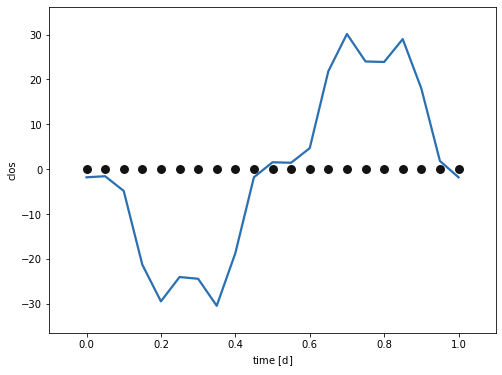

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [19]:
b.plot(show=True)

arg T_3 vs. time is mostly sensitive to photocentre motions of `b.default_binary()`.